## First Project

In [3]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import hvplot.pandas
import geopandas as gpd
import seaborn as sns
import folium
from folium.features import GeoJsonTooltip
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from PIL import Image


import matplotlib.pyplot as plt

In [5]:
# Set the file path into csv_path and reading the csv file into lending_club_data
csv_path= os.path.join("Resources/lc_2016_2017.csv")
lending_club_data = pd.read_csv(csv_path, low_memory=False)

# Print the info to verify the read_csv is reading the file properly 
lending_club_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

### Data Cleaning

In [6]:
# Cleaning uneccesary data (pt.1)

lending_club_data.drop(['id','member_id','desc','policy_code','issue_d','initial_list_status','application_type'],axis=1,inplace=True)

lending_club_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    759338 non-null  int64  
 1   funded_amnt                  759338 non-null  int64  
 2   funded_amnt_inv              759338 non-null  float64
 3   term                         759338 non-null  object 
 4   int_rate                     759338 non-null  float64
 5   installment                  759338 non-null  float64
 6   grade                        759338 non-null  object 
 7   sub_grade                    759338 non-null  object 
 8   emp_title                    708368 non-null  object 
 9   emp_length                   708975 non-null  object 
 10  home_ownership               759338 non-null  object 
 11  annual_inc                   759338 non-null  float64
 12  verification_status          759338 non-null  object 
 13 

In [7]:
# Cleaning uneccesary data (pt.2)

# Converting null values to 0, or None depending on the type of data

lending_club_data[['dti_joint',
                   'annual_inc_joint',
                   'il_util' , 
                   'mths_since_rcnt_il', 
                   'open_acc_6m', 
                   'open_il_12m', 
                   'open_il_24m', 
                   'total_bal_il', 
                   'inq_last_12m' , 
                   'open_rv_12m', 
                   'open_rv_24m', 
                   'max_bal_bc', 
                   'all_util', 
                   'inq_fi', 
                   'total_cu_tl' ]] = lending_club_data[['dti_joint',
                                                         'annual_inc_joint',
                                                         'il_util' , 
                                                         'mths_since_rcnt_il', 
                                                         'open_acc_6m', 
                                                         'open_il_12m', 
                                                         'open_il_24m', 
                                                         'total_bal_il', 
                                                         'inq_last_12m' , 
                                                         'open_rv_12m', 
                                                         'open_rv_24m', 
                                                         'max_bal_bc', 
                                                         'all_util', 
                                                         'inq_fi', 
                                                         'total_cu_tl']].fillna(0)


lending_club_data[['tot_coll_amt',
                   'tot_cur_bal',
                   'total_rev_hi_lim']] = lending_club_data[['total_rev_hi_lim', 
                                                             'tot_cur_bal', 
                                                             'tot_coll_amt']].fillna(0)

lending_club_data.verification_status_joint = lending_club_data.verification_status_joint.fillna('None')

# Converting NaN values to 0 or 1 for the following columns

lending_club_data.mths_since_last_record = lending_club_data.mths_since_last_record.apply(lambda x: 0 if pd.isna(x) else 1) 
lending_club_data.mths_since_last_major_derog = lending_club_data.mths_since_last_major_derog.apply(lambda x: 0 if pd.isna(x) else 1) 
lending_club_data.mths_since_last_delinq = lending_club_data.mths_since_last_delinq.apply(lambda x: 0 if pd.isna(x) else 1)

# Drop the following five columns

lending_club_data.drop(['next_pymnt_d' ,'last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True) 

lending_club_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    759338 non-null  int64  
 1   funded_amnt                  759338 non-null  int64  
 2   funded_amnt_inv              759338 non-null  float64
 3   term                         759338 non-null  object 
 4   int_rate                     759338 non-null  float64
 5   installment                  759338 non-null  float64
 6   grade                        759338 non-null  object 
 7   sub_grade                    759338 non-null  object 
 8   emp_title                    708368 non-null  object 
 9   emp_length                   708975 non-null  object 
 10  home_ownership               759338 non-null  object 
 11  annual_inc                   759338 non-null  float64
 12  verification_status          759338 non-null  object 
 13 

In [ ]:
# Save emp_length (Employment Length) unique values into emp_length_unique DataFrame

emp_length_unique = lending_club_data[['emp_length']].value_counts().to_frame('total')

emp_length_unique

,total
emp_length,
10+ years,257944
2 years,69494
< 1 year,62724
3 years,60843
1 year,50585
5 years,46139
4 years,45573
6 years,32616
8 years,28707


In [ ]:
# Making a copy of the original DataFrame into a new one
demograph_lc_data = lending_club_data.copy()

# Giving a more proper format to the emp_title and home_ownership columns
demograph_lc_data["emp_title"] = demograph_lc_data["emp_title"].str.title()
demograph_lc_data["home_ownership"] = demograph_lc_data["home_ownership"].str.title()

# Saving the relevant information for demographic analysis into a smaller DataFrame
demograph_lc_data = demograph_lc_data[["addr_state", 
                                       "emp_title", 
                                       "emp_length",
                                       "annual_inc",
                                       "home_ownership",
                                       "title"]].dropna()

# Renaming the columns for better presentation
demograph_lc_data = demograph_lc_data.rename(columns={"addr_state": "Address State",
                                                      "emp_title": "Employee Title",
                                                      "emp_length": "Employment Length",
                                                      "annual_inc": "Annual Income",
                                                      "home_ownership": "Home Ownership",
                                                      "title": "Title"
})

# Displaying data sample
demograph_lc_data.head()

,Address State,Employee Title,Employment Length,Annual Income,Home Ownership,Title
1,MA,Teacher,10+ years,94000.0,Mortgage,Debt consolidation
2,MA,Front Office,7 years,46350.0,Mortgage,Home improvement
3,CA,Manager,10+ years,44000.0,Rent,Car financing
4,MN,Paramedic,10+ years,85000.0,Mortgage,Debt consolidation
5,PA,Teacher,10+ years,70000.0,Mortgage,Debt consolidation


In [ ]:
# Set the file path into csv_path and reading the csv file into us_zipcodes_dat
csv_path_zip= os.path.join("Resources/uszips.csv")
us_zipcodes_data = pd.read_csv(csv_path_zip, low_memory=False)

# Dropping unnecesary columns from the data
us_zipcodes_data = us_zipcodes_data[["state_id", 
                                     "lat", 
                                     "lng", 
                                     "city"]].dropna()

# Print the info just to verify the read_csv is reading the file properly 
us_zipcodes_data.head()

,state_id,lat,lng,city
0,PR,18.18027,-66.75266,Adjuntas
1,PR,18.36075,-67.17541,Aguada
2,PR,18.45744,-67.12225,Aguadilla
3,PR,18.16585,-66.93716,Maricao
4,PR,18.29110,-67.12243,Anasco


In [ ]:
# Load shapefile for US states data
shapefile_path = "Resources/States_shapefile.shp"
us_states = gpd.read_file(shapefile_path)

us_states.head()

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


In [ ]:
# # Aggregate demographic data by state
demographic_agg = demograph_lc_data['Address State'].value_counts().reset_index()
demographic_agg.columns = ['State_Name', 'count']

# Reset index for demographic_agg DataFrame
demographic_agg = demographic_agg.reset_index()

# Merge based on index
merged_data = us_states.merge(demographic_agg, left_index=True, right_index=True, suffixes=('_us_states', '_demographic_agg'))

merged_data.head()

,FID,Program,State_Code,State_Name_us_states,Flowing_St,FID_1,geometry,index,State_Name_demographic_agg,count
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",0,CA,92337
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824...",1,TX,59442
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",2,NY,56674
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508...",3,FL,48533
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",4,IL,28394


In [ ]:
# Convert State Names in us_states DataFrame to abbreviated uppercase letters
us_states['State_Name'] = us_states['State_Name'].map(lambda x: x[:2].upper())

# Merge demographic data with state count data again
merged_data = us_states.merge(demographic_agg, left_on='State_Name', right_on='State_Name', how='left')

# Now check the merged data
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         51 non-null     int64   
 1   Program     27 non-null     object  
 2   State_Code  51 non-null     object  
 3   State_Name  51 non-null     object  
 4   Flowing_St  51 non-null     object  
 5   FID_1       51 non-null     int64   
 6   geometry    51 non-null     geometry
 7   index       33 non-null     float64 
 8   count       33 non-null     float64 
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 3.7+ KB


### Choropleth map with the amount of users (Loans given) by state

In [ ]:
# Create a map centered on the United States
map = folium.Map(location=[37, -102], zoom_start=4)

# Add choropleth layer
choropleth = folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['State_Code', 'count'],  
    key_on='feature.properties.State_Code',
    fill_color='PRGn',  # Try a different color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Users by State',
    highlight=True,
    reset=True,
).add_to(map)

# Define a custom tooltip
tooltip = folium.GeoJsonTooltip(
    fields=['State_Code', 'count'],
    aliases=['State', 'Count'],
    localize=True,
    sticky=False,
    labels=True,
    style=("background-color: white; color: #333333; font-family: sans-serif"),
)

# Add tooltip to choropleth layer
choropleth.geojson.add_child(tooltip)

# Add layer control
folium.LayerControl().add_to(map)

# Save the map into an html file
map.save('Outputs/users_count.html')

# Display the map
map

### Wordcloud graph with the popularity of the type of loans given

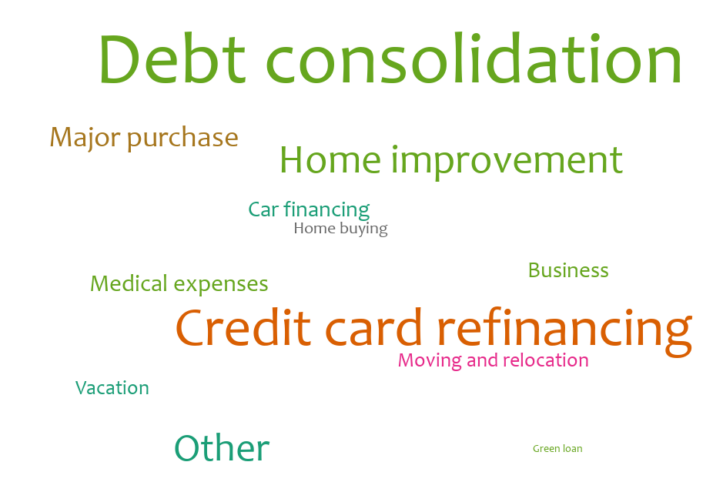

In [ ]:
# Count the frequency of each loan type
title_counts = demograph_lc_data['Title'].value_counts()

# Generate a dictionary where the keys are titles and values are their frequencies
title_freq_dict = title_counts.to_dict()

# Generate the word cloud with title frequencies as weights
wordcloud = WordCloud(width=900, height=600, background_color='white', colormap='Dark2', font_path='Candara',
                      max_words=12, relative_scaling=0.4).generate_from_frequencies(title_freq_dict)

# Create a new figure
plt.figure(figsize=(9, 6))

# Display the word cloud with matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save word cloud as image
plt.savefig('Outputs/wordcloud.jpg', bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()

### Choropleth map with the mean annual income by state

In [ ]:
# Aggregate demographic data by state and calculate mean annual income
income_agg = demograph_lc_data.groupby('Address State')['Annual Income'].mean().reset_index()
income_agg.columns = ['State_Name', 'Mean_Annual_Income']

# Merge mean annual income data with state data
merged_data = us_states.merge(income_agg, left_on='State_Name', right_on='State_Name', how='left')

# Create a map centered on the United States
map = folium.Map(location=[37, -102], zoom_start=4)

# Add choropleth layer for mean annual income
choropleth = folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['State_Code', 'Mean_Annual_Income'],  # Use 'Mean_Annual_Income' column
    key_on='feature.properties.State_Code',
    fill_color='BrBG',  # Try a different color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mean Annual Income by State',
    highlight=True,
    reset=True,
).add_to(map)

# Define a custom tooltip
tooltip = folium.GeoJsonTooltip(
    fields=['State_Code', 'Mean_Annual_Income'],
    aliases=['State', 'Mean Annual Income'],
    localize=True,
    sticky=False,
    labels=True,
    style=("background-color: white; color: #333333; font-family: sans-serif"),
)

# Add tooltip to choropleth layer
choropleth.geojson.add_child(tooltip)

# Add layer control
folium.LayerControl().add_to(map)

# Save the map into an html file
map.save('Outputs/mean_annual_income.html')

# Display the map
map

In [ ]:
print(lending_club_data.columns)


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12

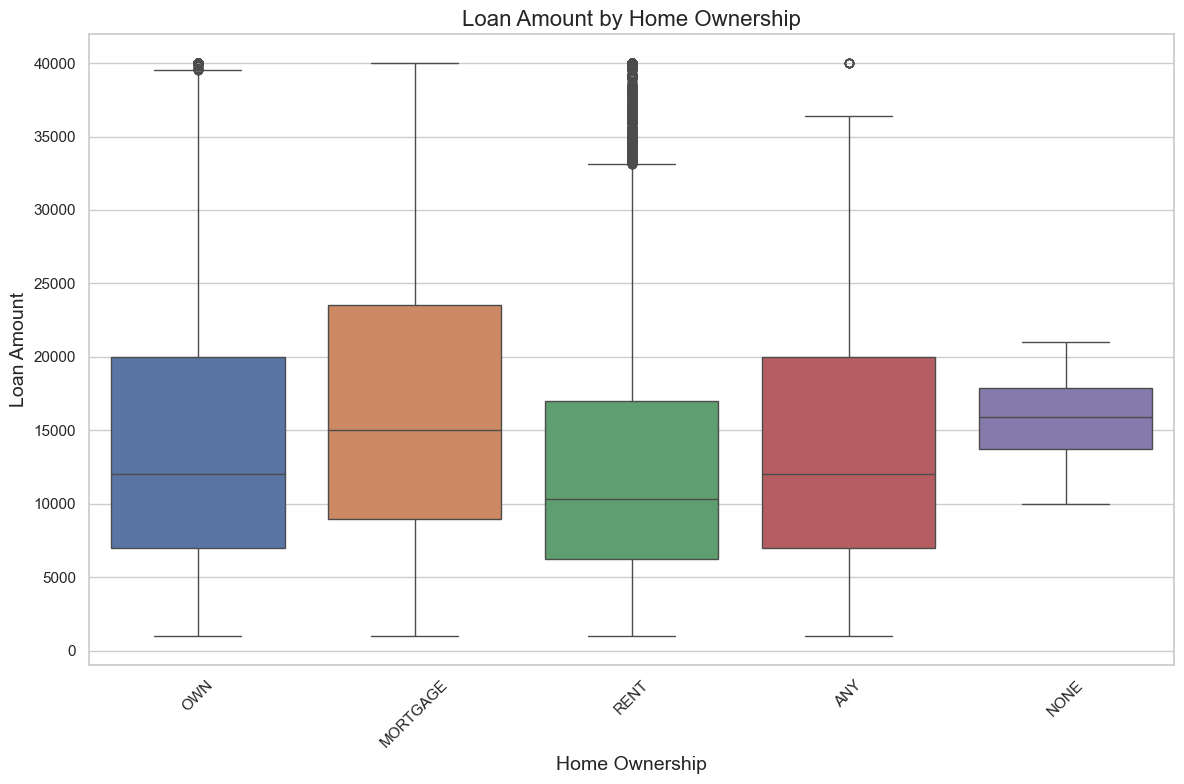

In [ ]:
# Set style
sns.set(style="whitegrid")

# Create the boxplot with seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='home_ownership', y='loan_amnt', data=demographic_data, hue='home_ownership', legend=False)

# Add title and labels
plt.title('Loan Amount by Home Ownership', fontsize=16)
plt.xlabel('Home Ownership', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save word cloud as image
plt.savefig('Outputs/boxplot.jpg', bbox_inches='tight', pad_inches=0)

# Show plot
plt.tight_layout()
plt.show()

## Analyzing products and Interests received

In [8]:
# Group by 'title' and calculate the total interest received for each product
revenue_by_product = lending_club_data.groupby('title')['total_rec_int'].sum().reset_index()

# Reset the index of the grouped DataFrame
revenue_by_product.reset_index(drop=True, inplace=True)

# Count the number of occurrences of each title in the original DataFrame
title_counts = lending_club_data['title'].value_counts().reset_index()
title_counts.columns = ['title', 'count']

# Merge the total interest received DataFrame with the title counts DataFrame based on the 'title' column
revenue_by_product = pd.merge(revenue_by_product, title_counts, on='title')


# Sort the products by total interest received in descending order
revenue_by_product.sort_values(by='total_rec_int', ascending=False, inplace=True)


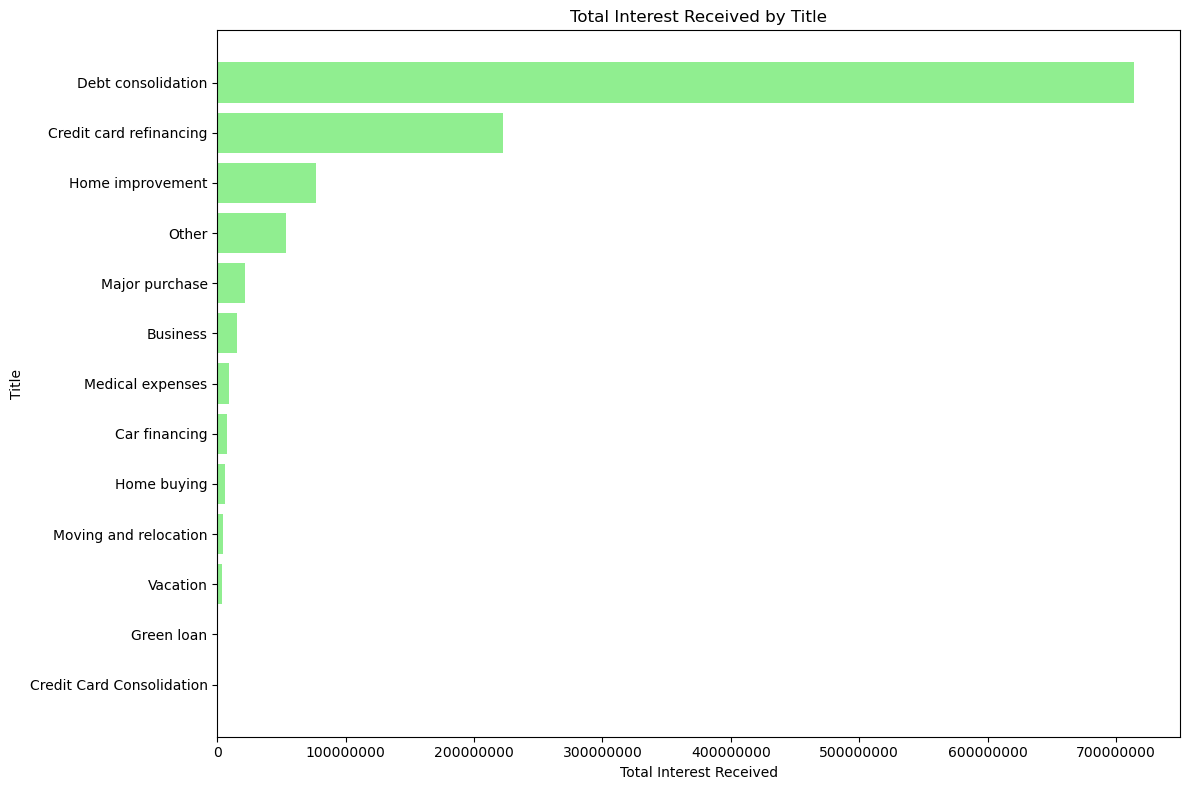

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Sort the DataFrame by total interest received in descending order
revenue_by_product.sort_values(by='total_rec_int', ascending=True, inplace=True)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(revenue_by_product['title'], revenue_by_product['total_rec_int'], color='lightgreen')

plt.xlabel('Total Interest Received')
plt.ylabel('Title')
plt.title('Total Interest Received by Title')

# Format tick labels on the x-axis without scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.savefig('Images-Karen/Total_Int_Rec_by_Title.jpg')
plt.show()


In [11]:
# Define a function to calculate the risk metric
def calculate_risk(row):
    # Initialize the risk metric
    risk = 0
    
    # Check if 'acc_now_delinq' is greater than 0
    if row['acc_now_delinq'] > 0:
        risk += 1
        
    # Check if 'delinq_2yrs' is greater than 0
    if row['delinq_2yrs'] > 0:
        risk += 1
        
    # Check if 'loan_status' includes the string 'Late'
    if 'Late' in row['loan_status']:
        risk += 1
        
    return risk

# Apply the function to calculate the risk metric for each title
lending_club_data['risk_metric'] = lending_club_data.apply(calculate_risk, axis=1)

# Group by 'title' and calculate the average risk metric for each title
average_risk_by_title = lending_club_data.groupby('title')['risk_metric'].mean().reset_index()

# Sort the titles based on the average risk metric
lowest_risk_titles = average_risk_by_title.sort_values(by='risk_metric', ascending=True)



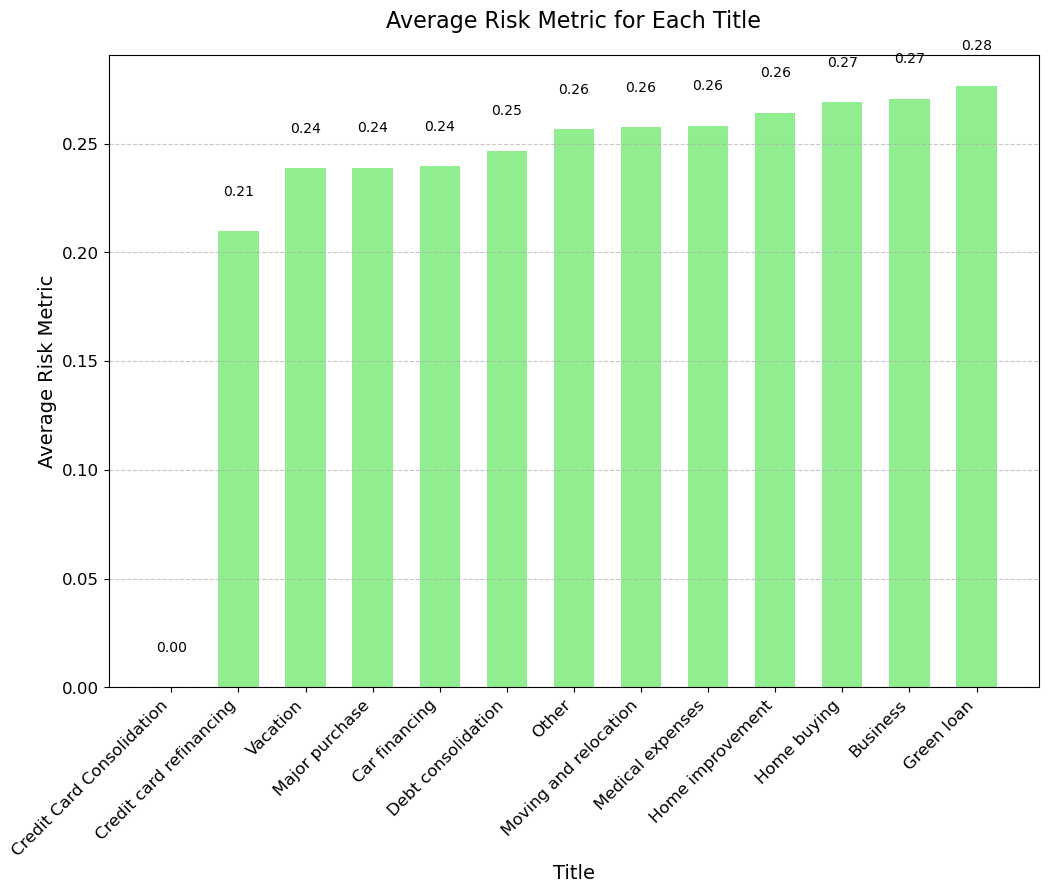

In [12]:

# Create a bar plot with customizations
plt.figure(figsize=(12, 8))  # Increase figure height
bars = plt.bar(lowest_risk_titles['title'], lowest_risk_titles['risk_metric'], color='lightgreen', width=0.6)
plt.title('Average Risk Metric for Each Title', fontsize=16, pad=20)  # Increase title padding
plt.xlabel('Title', fontsize=14)
plt.ylabel('Average Risk Metric', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.015,  # Adjust the y-coordinate here
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

plt.subplots_adjust(top=0.9)  # Adjust top margin
plt.savefig('Images-Karen/Average_Risk_Metric_for_Each_Title.jpg')
plt.show()

In [13]:
# Group the data by 'grade' and count the occurrences of each title
title_counts_by_grade = lending_club_data.groupby('grade')['title'].value_counts().reset_index(name='count')

# Sort the counts within each grade
title_counts_by_grade.sort_values(by=['grade', 'count'], ascending=[True, False], inplace=True)

# Select the top 5 titles for each grade
top_titles_by_grade = title_counts_by_grade.groupby('grade').head(5)

# Reset the index for readability
top_titles_by_grade.reset_index(drop=True, inplace=True)

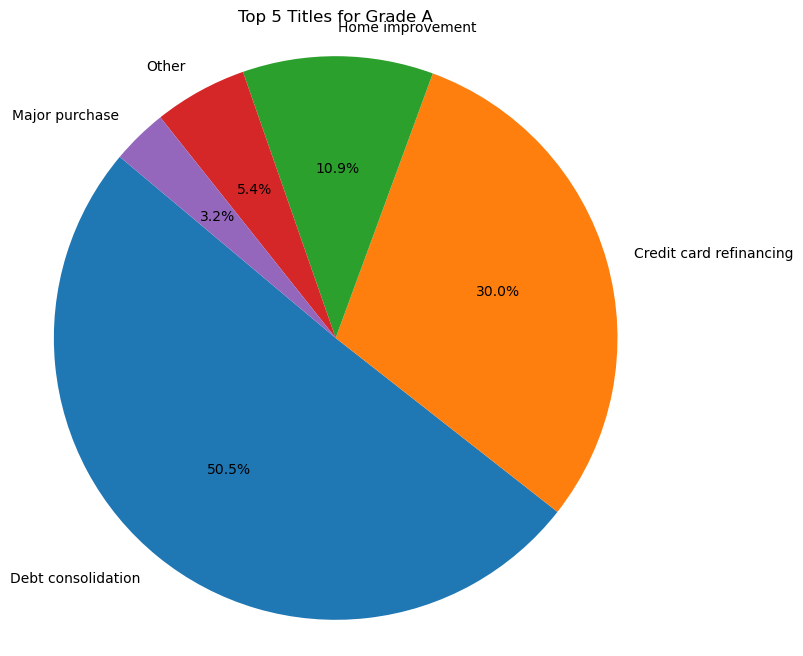

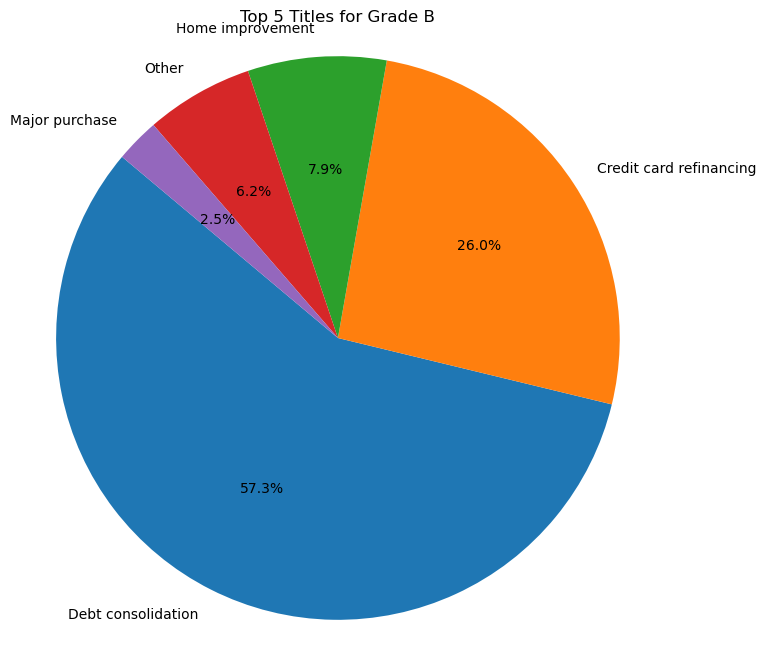

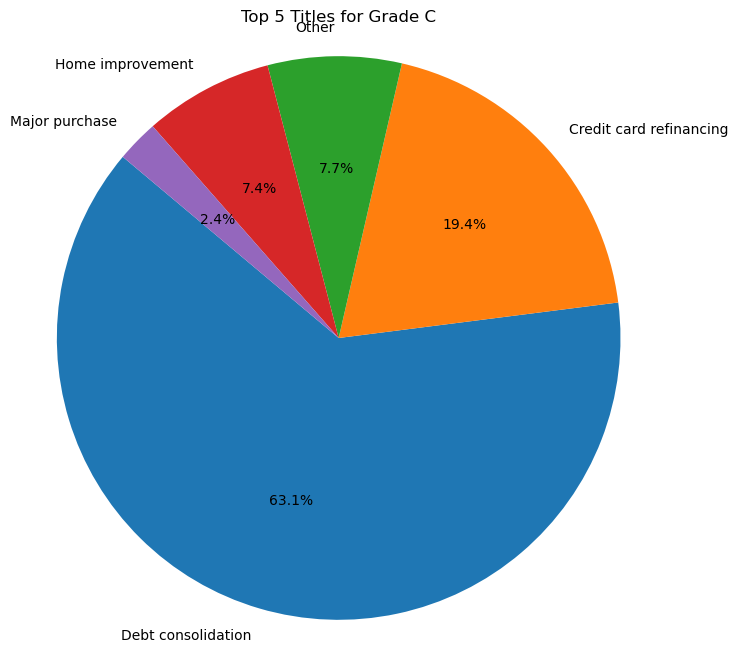

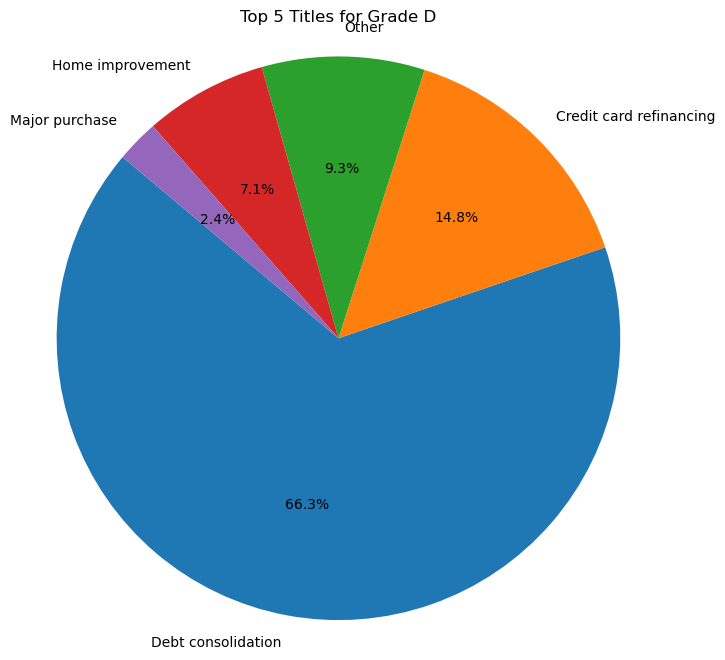

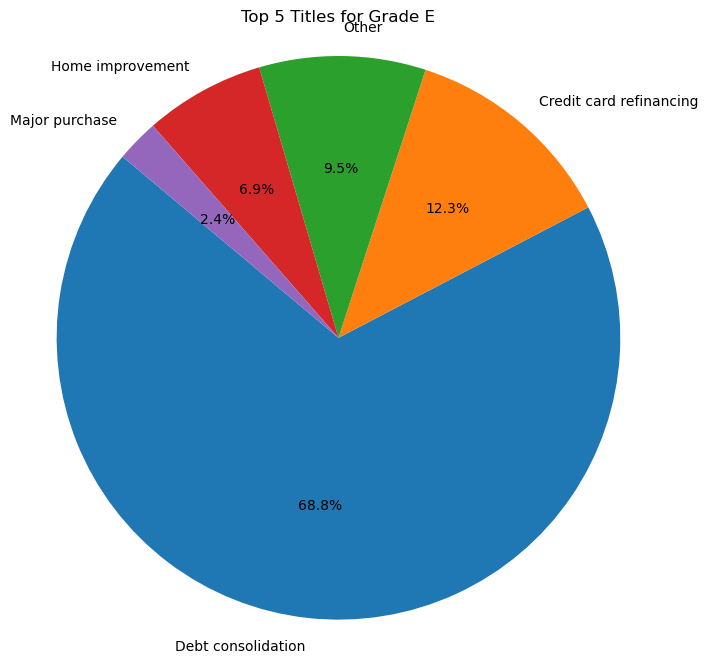

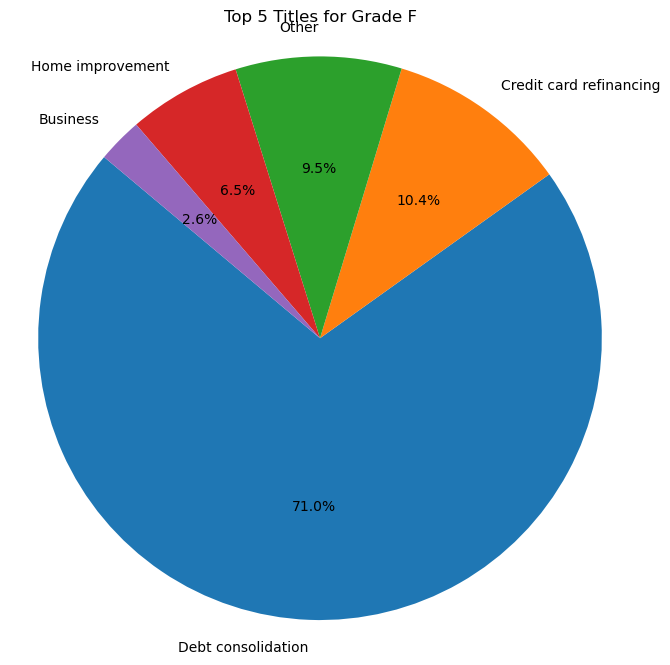

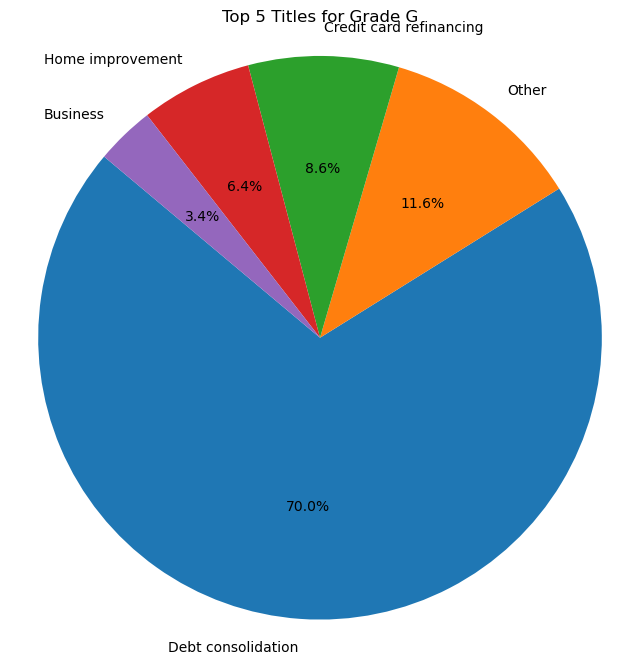

In [17]:
import matplotlib.pyplot as plt

# Create directory to store images if it doesn't exist
output_directory = 'Images-Karen'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Create pie plots for each grade
for grade, group_data in top_titles_by_grade.groupby('grade'):
    plt.figure(figsize=(8, 8))
    plt.pie(group_data['count'], labels=group_data['title'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Titles for Grade {grade}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # Generate file name based on grade value
    file_name = os.path.join(output_directory, f'Top_5_Titles_for_Grade_{grade}.jpg')
    
    # Save the plot with the generated file name
    plt.savefig(file_name)
    
    # Show the plot
    plt.show()

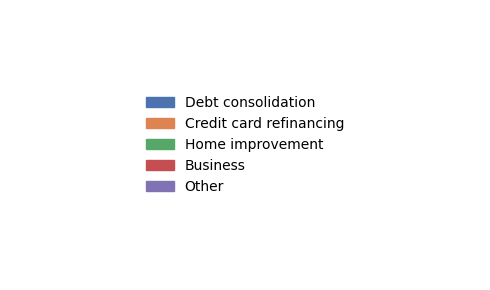

In [18]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Define colors and corresponding labels
colors = ['#4c72b0', '#de8452', '#56a868', '#c54e52', '#8172b3']  # Hex codes for blue, orange, green, red, purple
labels = ['Debt consolidation', 'Credit card refinancing', 'Home improvement', 'Business', 'Other']

patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Configure legend
plt.figure(figsize=(5,3))
plt.legend(handles=patches, loc='center', frameon=False)
plt.axis('off')
plt.tight_layout()
plt.savefig('Images-Karen/Legend_for_pie_Charts.jpg')
plt.show()

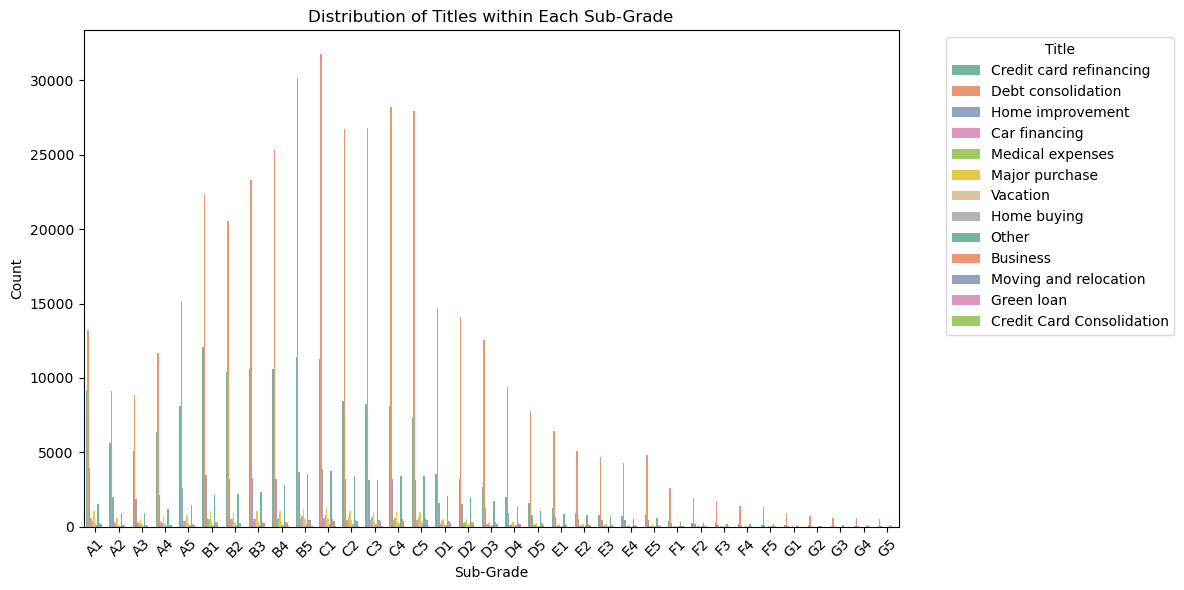

In [19]:
# Create a countplot to visualize the distribution of titles within each sub-grade
# Define the order of sub-grades
sub_grade_order = sorted(lending_club_data['sub_grade'].unique(), reverse=False)

plt.figure(figsize=(12, 6))
sns.countplot(data=lending_club_data, x='sub_grade', hue='title', palette='Set2', order=sub_grade_order)
plt.title('Distribution of Titles within Each Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Images-Karen/Distribution_of_Titles_within_each_sub_grade.jpg')
plt.show()

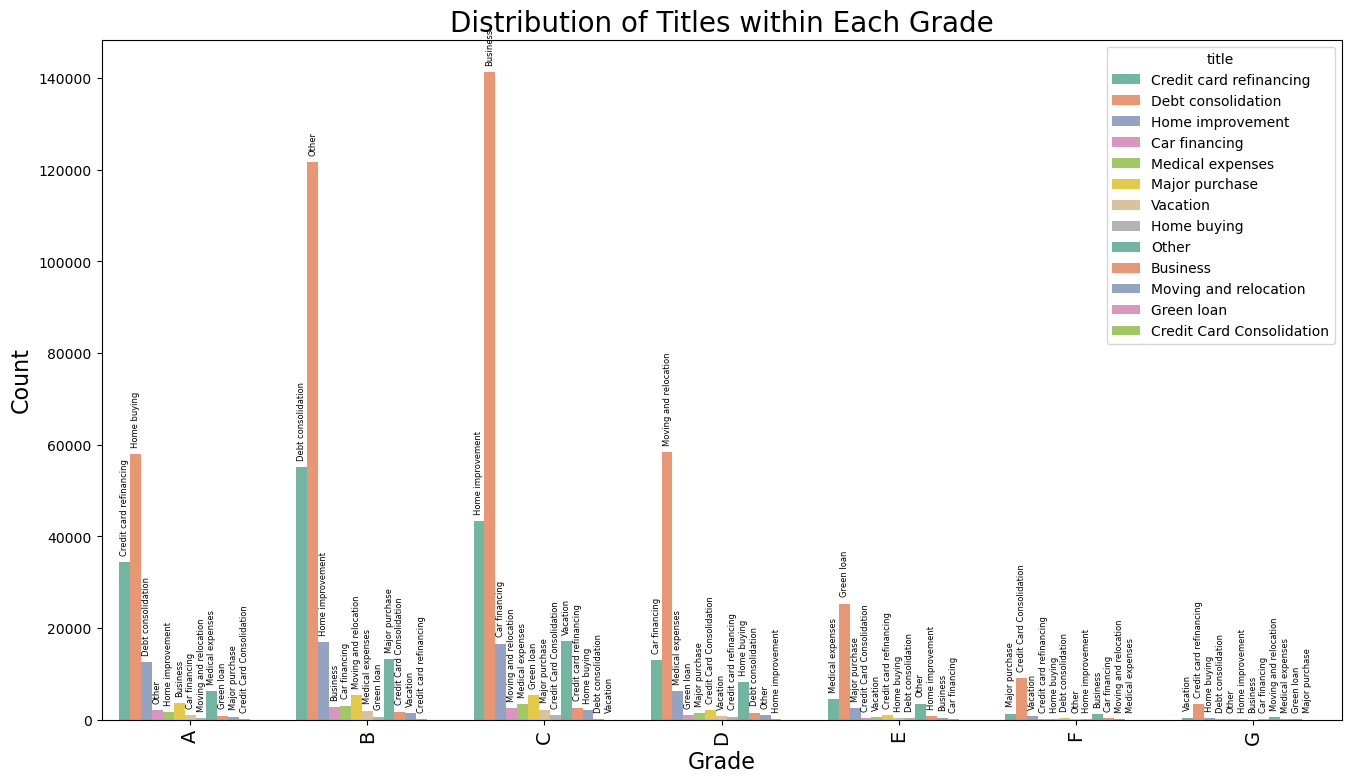

In [20]:
# Create a figure and a bar plot
plt.figure(figsize=(16, 10))
ax = sns.countplot(data=lending_club_data, x='grade', hue='title', palette='Set2', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Set title and labels
plt.title('Distribution of Titles within Each Grade', fontsize=20)
plt.xlabel('Grade', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Increase the rotation for x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=14)

# Extract unique titles from the legend
legend_labels = [l.get_text() for l in ax.get_legend().get_texts()]

# Modify the annotations to position the labels correctly
for i, p in enumerate(ax.patches):
    if p.get_height() > 0:  # Only label bars with height greater than 0
        title = legend_labels[i % len(legend_labels)]  # Cycle through unique titles
        ax.annotate(title, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=6, color='black', rotation=90,
                    xytext=(0, 5), textcoords='offset points')

# Adjust the bottom margin to prevent x-axis labels from overlapping with the axis
plt.subplots_adjust(bottom=0.2)
plt.savefig('Images-Karen/Distribution_of_Titles_within_each_grade.jpg')
plt.show()

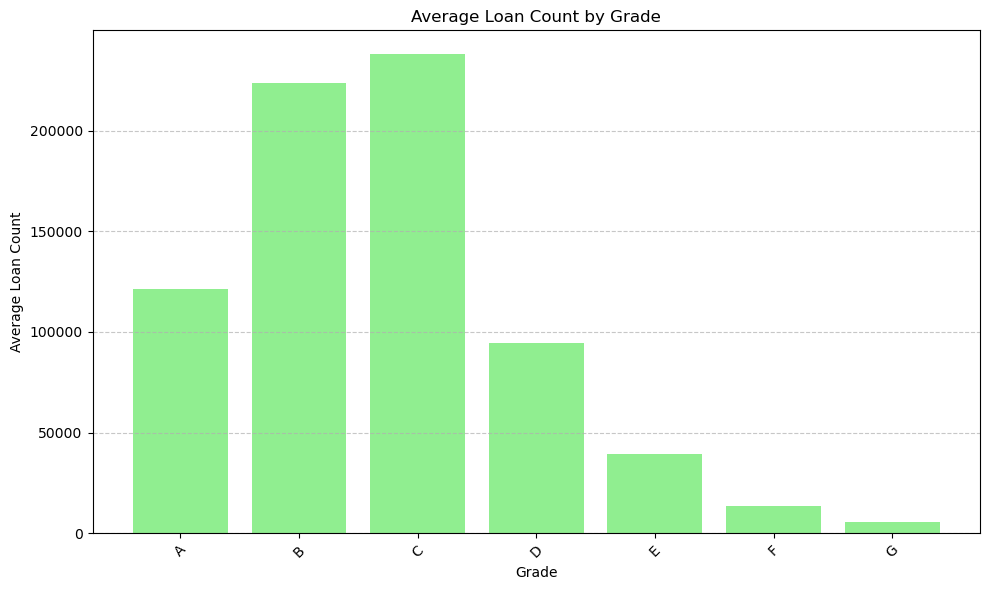

In [21]:
# Group by 'grade' and calculate the mean count of loans for each grade
average_loan_count_by_grade = lending_club_data.groupby('grade')['title'].count().reset_index()
average_loan_count_by_grade.rename(columns={'title': 'average_loan_count'}, inplace=True)
average_loan_count_by_grade['grade'] = pd.Categorical(average_loan_count_by_grade['grade'], ordered=True, categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
average_loan_count_by_grade = average_loan_count_by_grade.sort_values(by='grade')

plt.figure(figsize=(10, 6))
plt.bar(average_loan_count_by_grade['grade'], average_loan_count_by_grade['average_loan_count'], color='lightgreen')
plt.title('Average Loan Count by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Loan Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Images-Karen/Average_Loan_Count_by_Grade.jpg')
plt.show()

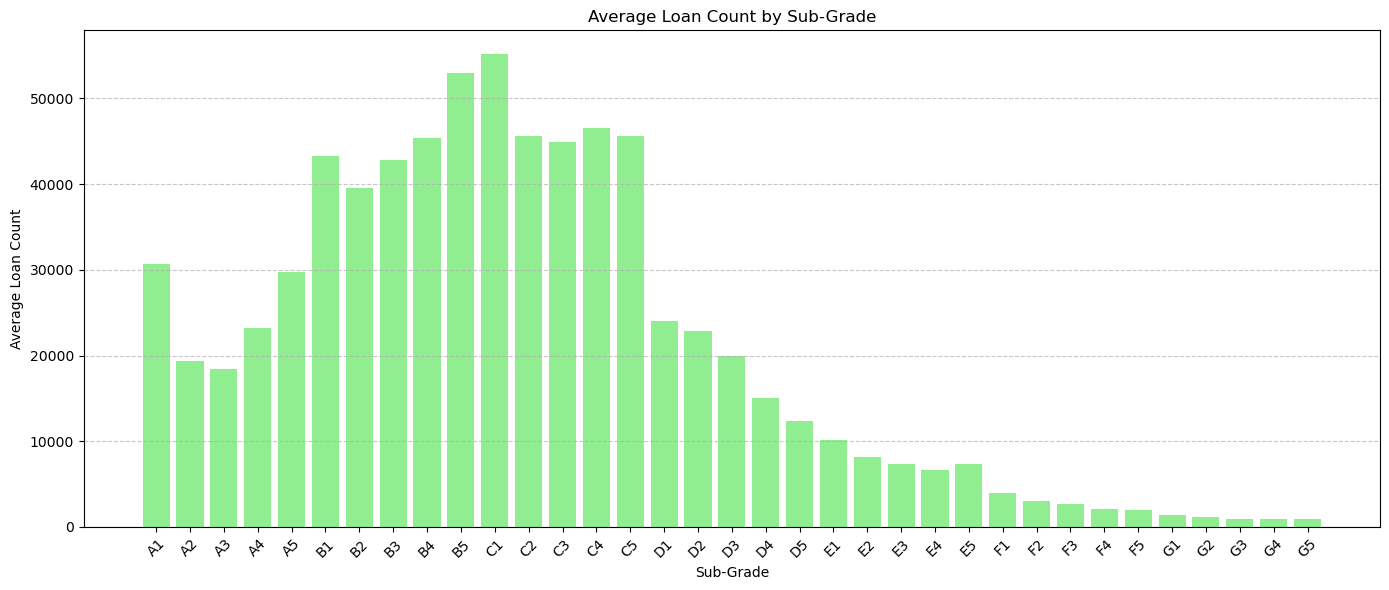

In [22]:
# Group by 'sub_grade' and calculate the mean count of loans for each sub-grade
average_loan_count_by_sub_grade = lending_club_data.groupby('sub_grade')['title'].count().reset_index()
average_loan_count_by_sub_grade.rename(columns={'title': 'average_loan_count'}, inplace=True)
average_loan_count_by_sub_grade['sub_grade'] = pd.Categorical(average_loan_count_by_sub_grade['sub_grade'], ordered=True, categories=sorted(lending_club_data['sub_grade'].unique(), reverse=True))
average_loan_count_by_sub_grade = average_loan_count_by_sub_grade.sort_values(by='sub_grade')

# Sort the DataFrame by sub-grade in descending order
average_loan_count_by_sub_grade = average_loan_count_by_sub_grade.sort_values(by='sub_grade', ascending=False)

# Create a bar plot for average loan count by sub-grade
plt.figure(figsize=(14, 6))
plt.bar(average_loan_count_by_sub_grade['sub_grade'], average_loan_count_by_sub_grade['average_loan_count'], color='lightgreen')
plt.title('Average Loan Count by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Average Loan Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Images-Karen/Average_Loan_Count_by_Sub_Grade.jpg')
plt.show()